In [64]:
import numpy as np
import sympy as sym
import pandas as pd
from mpmath import *
import matplotlib.pyplot as plt


In [10]:
s,t,x = sym.symbols('s t x', real = True)
x1,x2,x3 = sym.symbols('x1 x2 x3')
A=np.array([[3, 10],[5,2]])
B=np.array([1,1])
C=np.array([1,0])
D=np.array([0])




In [4]:
def numpy2sympy(M):
    return sym.Matrix(M)

def ss2tf(A,B,C,D):
    '''this method converts from state space to transfer function
    inputs: A Matrix, B Matrix, C Matrix, D Matrix
    returns: transfer function'''
    A,B,C,D=numpy2sympy(A),numpy2sympy(B),numpy2sympy(C),numpy2sympy(D)   
    TF=C.transpose() * (sym.eye(A.shape[0])*s-A).inv() * B + sym.Matrix([D])
    TF=sym.simplify(TF)
    return TF
ss2tf(A,B,C,D)


Matrix([[(s + 8)/(s**2 - 5*s - 44)]])

In [446]:
A=np.array([[0, 1,0],[0,0,1],[-6,-11,-6]])
def isStable(A):
    '''checks whether a system is stable or not
    Parameters: A Matrix
    return True or False'''
    A=numpy2sympy(A)
    for i in A.eigenvals().keys():
        if i>0:
            return False
        else:
            return True
isStable(A)


True

In [448]:
A=np.array([[0, 1],[-1,-2]])
C=np.array([1,0])

def isObservable(A,C):
    '''checks whether a system is observable or not
    Parameters: A Matrix, C Matrix
    return True or False'''
    A,C=numpy2sympy(A),numpy2sympy(C)
    n=A.shape[0]        
    O=C.transpose()
    for i in range(n-1):
        O=O.row_insert(i+1,C.transpose()*A**(i+1))
    if O.rank()==n:
        return True
    else :
        return False

isObservable(A,C)



True

In [449]:
A=np.array([[0, 1],[-1,-2]])
B=np.array([0,1])

def isControllable(A,B):
    '''checks whether a system is controllable or not
    Parameters: A Matrix, B Matrix
    return True or False'''
    A,B=numpy2sympy(A),numpy2sympy(B) 
    n=A.shape[0]
    c=B
    for i in range(n-1):
        c=c.col_insert(i+1,A**(i+1)*B)
        
    if c.rank()==n:
        return True
    else :
        return False

    
isControllable(A,B)

True

In [450]:
def tf2ss(num,den):
    pass

In [511]:
#take too much time to inverse laplace
A=np.array([[3, 10],[5,2]])
B=np.array([1,1])
x0=np.array([1,0])
u=1

def solve(A,B,x0,u):
    '''finds the system solution in S domain
    Parameters: A Matrix ,B Matrix,initial condtion Matrix,input u
    returns: system solution in time domain
    '''
    A,B,x0=numpy2sympy(A),numpy2sympy(B),numpy2sympy(x0)
    u=sym.laplace_transform(u, t, s, noconds=True)
    x=(sym.eye(A.shape[0])*s-A).inv()*x0 +(sym.eye(A.shape[0])*s-A).inv()*B*u
    x=sym.simplify(x)

    return x


In [512]:
solve(A,B,x0,u)

Matrix([
[(s**2 - s + 8)/(s*(s**2 - 5*s - 44))],
[   2*(3*s + 1)/(s*(s**2 - 5*s - 44))]])

In [513]:
def roots2poly(*roots):
    from sympy import Symbol
    x = Symbol('x')
    whole =1
    for root in roots:
        whole *=(x-root)
    p=sym.poly(whole.expand(),x)
    p=p.all_coeffs()
    return p 


def placePoles(A,B,p):
    '''
    finds gain k for pole placplacement using Ackermann's method
    Parameters: A Matrix,B Matrix, poles
    returns: gain vector
    
    '''
    A,B=numpy2sympy(A),numpy2sympy(B)  

    arr=np.zeros((1,A.shape[0]-1))
    arr=sym.Matrix(np.append(arr,[1])).transpose()
    
    
    n=A.shape[0]
    c=B
    for i in range(n-1):
        c=c.col_insert(i+1,A**(i+1)*B)
    
    Q=sym.zeros(A.shape[0])
    for i in range(len(p)):
        Q=Q+p[i]*A**(len(p)-1-i)
    
    return (arr * c.inv() * Q)  

A=np.array([[0, 1,0],[0,0,1],[-2,-3,-5]])
B=np.array([0,0,1])
p=roots2poly(-4+3j,-4-3j,-4)





In [514]:
k=placePoles(A,B,p)
k

Matrix([[98.0, 54.0, 7.0]])

In [174]:

n=np.array([1,3,3])
d=np.array([1,2,1])
tf=sym.Poly(n,s)/sym.Poly(d,s)

A=np.zeros((len(d)-1,len(d)-1))
A[:,len(A)-1]=-1*d[1:][::-1]
A[1:,0:len(A)-1]=np.eye(len(d)-2)
if len(d) >len(n):
    B=n[::-1]
    C=np.append(np.zeros(len(A)-2),[1])
    D=0
elif len(d)==len(n):
    D=sym.limit(tf,s,sym.oo)
    n=(tf-D)*sym.Poly(d,s)
    n=sym.Poly(sym.simplify(n),s)
    n=n.coeffs()
    B=np.asarray(n[::-1])
    C=np.append(np.zeros(len(A)-2),[1])

D=np.array(D)




In [175]:
A,B,C,D

(array([[ 0., -1.],
        [ 1., -2.]]),
 array([2, 1], dtype=object),
 array([1.]),
 array(1, dtype=object))

In [165]:
ss2tf(A,B,C,D)

NotImplementedError: SymPy supports just 1D and 2D matrices

In [55]:
n=np.array([4])
d=np.array([1,2,10])


In [155]:
def step(n,d):
    tf=sym.Poly(n,s)/sym.Poly(d,s)
    Sresp=(1/s)*tf #step response in s domain

    mp.dps = 15; mp.pretty = True
    tt = np.linspace(.001,10,100)
    fs = lambda s: eval(str(Sresp)) # Sresp as a lambda expression so that mpmath can deal with it
    y=[]                             
    for tti in tt:
        y.append(invertlaplace(fs,tti,method='talbot')) # numerically evaluating inverse laplace  
                                                        # for all pointss in tt array
                                                      
    plt.plot(tt,y)
    plt.axhline(.4, linestyle = 'dotted',color = 'r')

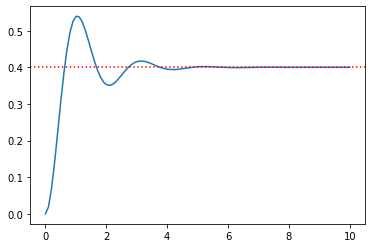

In [156]:
step(n,d)

In [124]:
y2=[]
for i in y:
    y2.append(float(i))

In [133]:
y2=np.average(y2)